In [1]:
library(tidyverse)


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────

In [3]:
color_dict = c("genot"= "#317d01",
    "CellFlow"= "#a4fa6e",
    "chemCPA"= "#e6b1fc",
    "CPA"= "#6c0399",
    "Baseline"="#8f97a8",
    "Additive"="#ffA500")

# Decoded

In [4]:
results_decoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/ood_metrics_decoded.csv") 



New names:
• `` -> `...1`
Rows: 135 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(results_decoded)

...1,model,metric,variable,value,split
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
0,CPA,r_squared,Givinostat+Dasatinib,0.9713756,1
1,id,r_squared,Givinostat+Dasatinib,0.9409509,1
2,chemCPA,r_squared,Givinostat+Dasatinib,0.9646668,1
3,otfm,r_squared,Givinostat+Dasatinib,0.9849701,1
4,add,r_squared,Givinostat+Dasatinib,0.9402916,1
5,CPA,r_squared,Givinostat+SRT1720,0.9798819,1


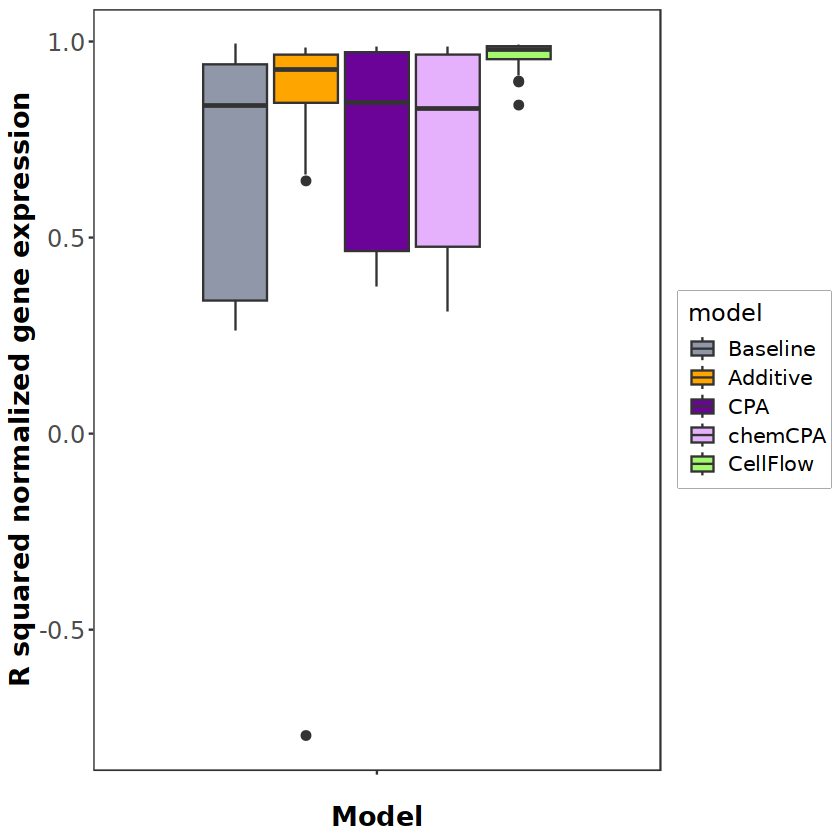

In [6]:
results_decoded$model <- factor(results_decoded$model, 
                                levels = c("id", "add", "CPA", "chemCPA", "otfm"),
                                labels = c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

ggplot(results_decoded, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="R squared normalized gene expression") +
  scale_fill_manual(values=color_dict, labels=c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


# Encoded

In [7]:
results_encoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/ood_metrics_encoded.csv") 



New names:
• `` -> `...1`
Rows: 540 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


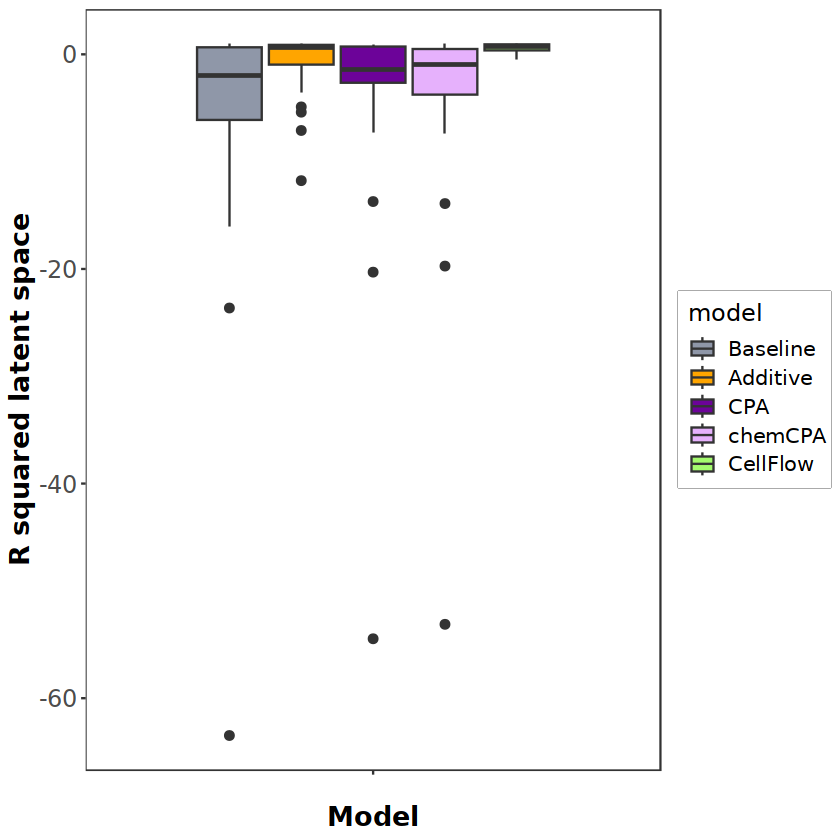

In [9]:
results <- results_encoded %>% filter(metric == "r_squared")

results$model <- factor(results$model, 
                                levels = c("id", "add", "CPA", "chemCPA", "otfm"),
                                labels = c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="R squared latent space") +
  scale_fill_manual(values=color_dict, labels=c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


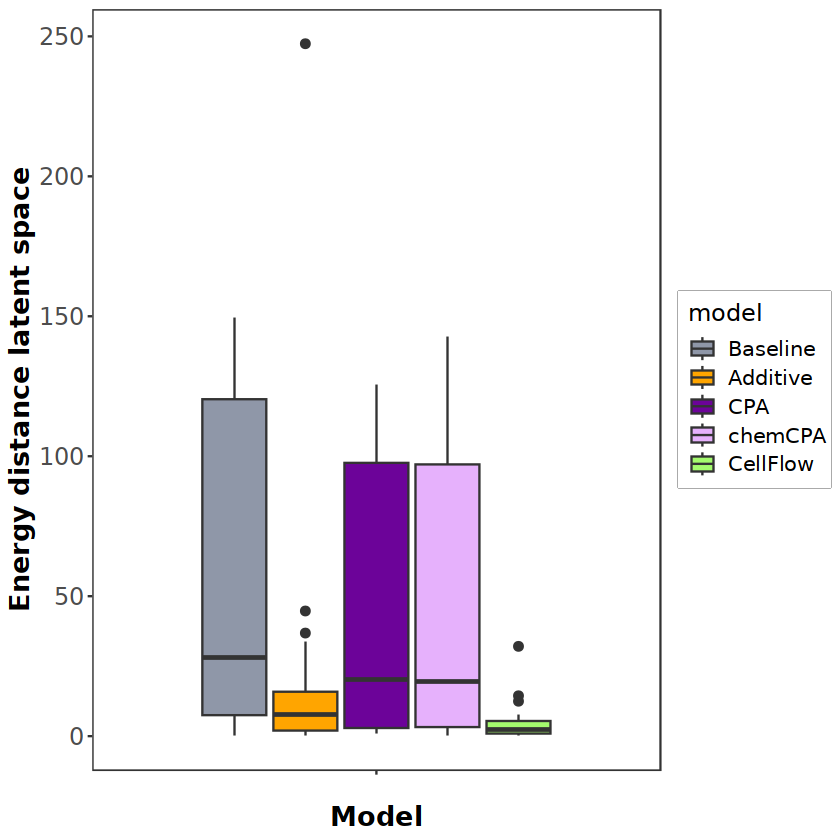

In [10]:
results <- results_encoded %>% filter(metric == "e_distance")

results$model <- factor(results$model, 
                                levels = c("id", "add", "CPA", "chemCPA", "otfm"),
                                labels = c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Energy distance latent space") +
  scale_fill_manual(values=color_dict, labels=c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


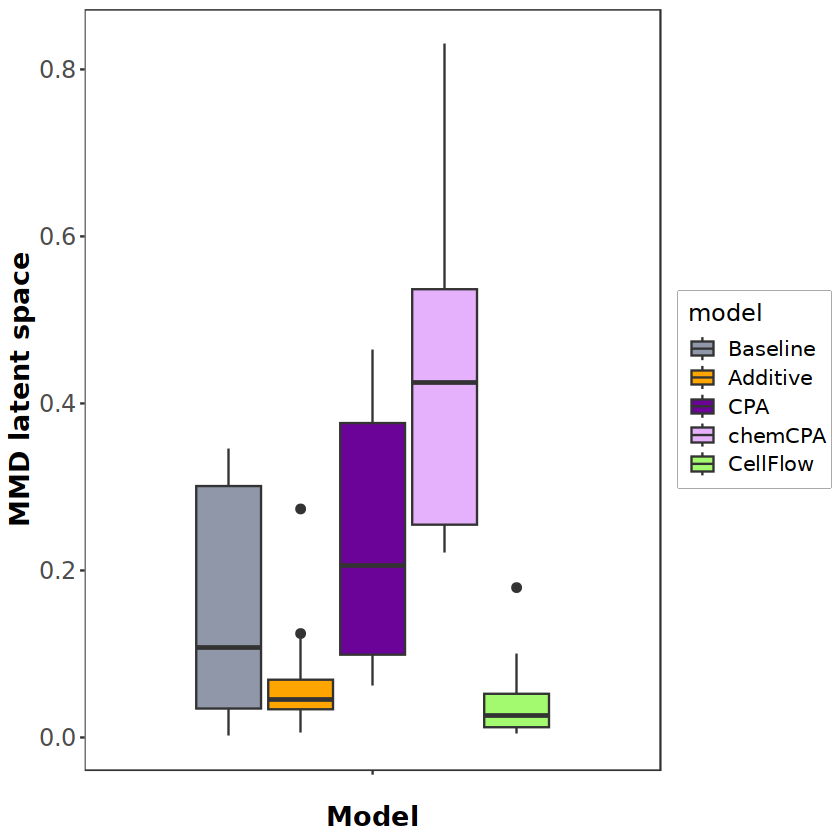

In [11]:
results <- results_encoded %>% filter(metric == "mmd")

results$model <- factor(results$model, 
                                levels = c("id", "add", "CPA", "chemCPA", "otfm"),
                                labels = c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="MMD latent space") +
  scale_fill_manual(values=color_dict, labels=c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


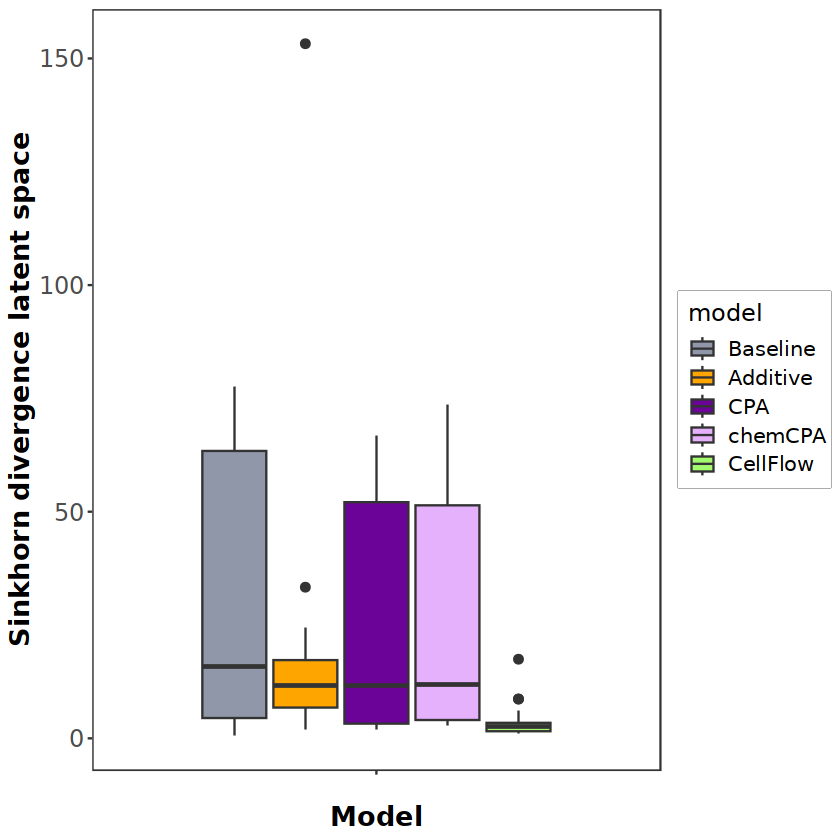

In [12]:
results <- results_encoded %>% filter(metric == "sinkhorn_div")

results$model <- factor(results$model, 
                                levels = c("id", "add", "CPA", "chemCPA", "otfm"),
                                labels = c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Sinkhorn divergence latent space") +
  scale_fill_manual(values=color_dict, labels=c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


# DEG

In [14]:
results_deg <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/ood_metrics_deg.csv") 



New names:
• `` -> `...1`
Rows: 540 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


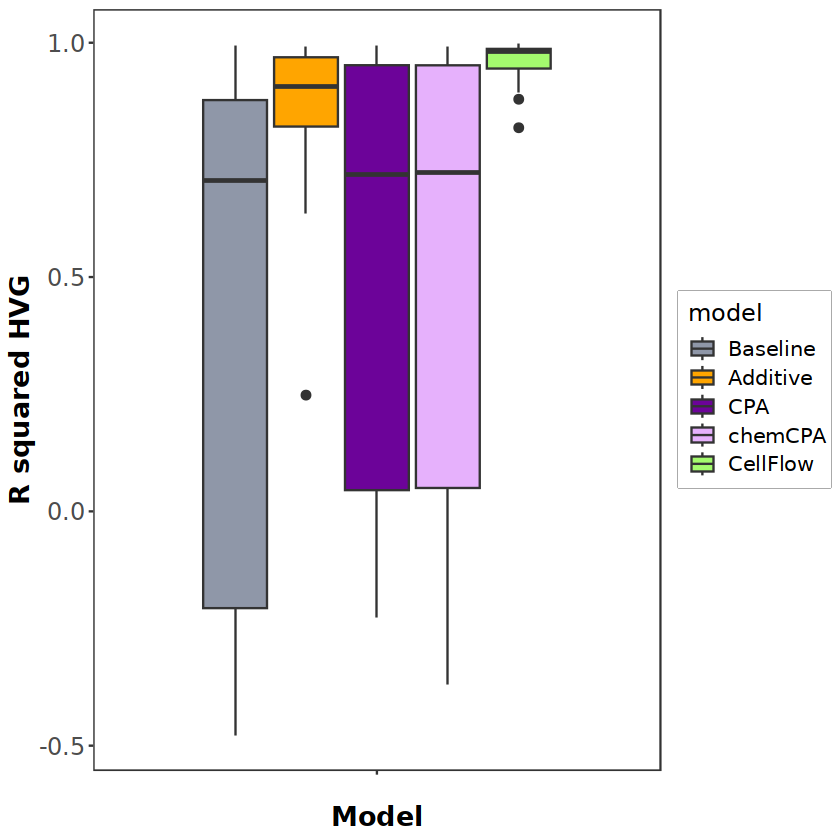

In [15]:
results <- results_deg %>% filter(metric == "r_squared")


results$model <- factor(results$model, 
                                                                levels = c("id", "add", "CPA", "chemCPA", "otfm"),
                                labels = c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="R squared HVG") +
    scale_fill_manual(values=color_dict, labels=c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


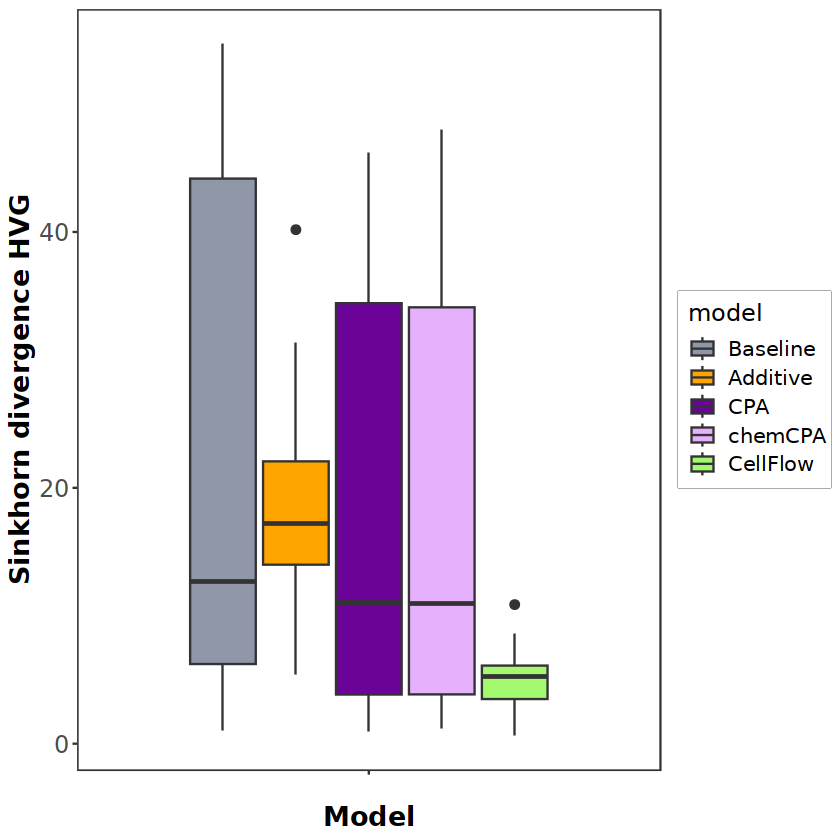

In [16]:
results <- results_deg %>% filter(metric == "sinkhorn_div")


results$model <- factor(results$model, 
                                levels = c("id", "add", "CPA", "chemCPA", "otfm"),
                                labels = c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Sinkhorn divergence HVG") +
    scale_fill_manual(values=color_dict, labels=c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


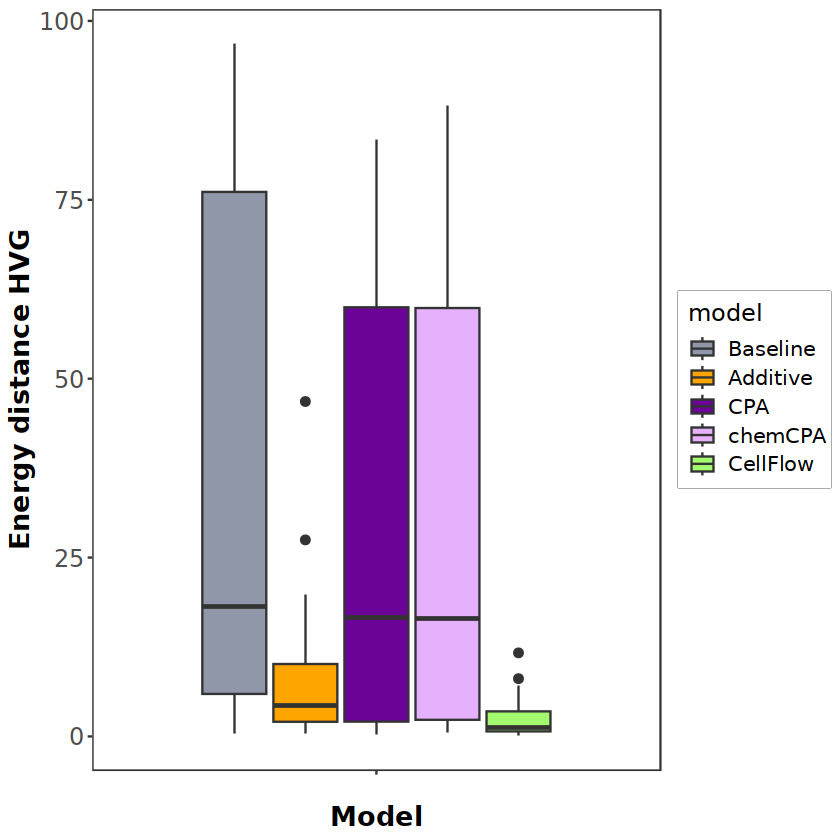

In [17]:
results <- results_deg %>% filter(metric == "e_distance")


results$model <- factor(results$model, 
                                levels = c("id", "add", "CPA", "chemCPA", "otfm"),
                                labels = c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Energy distance HVG") +
    scale_fill_manual(values=color_dict, labels=c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


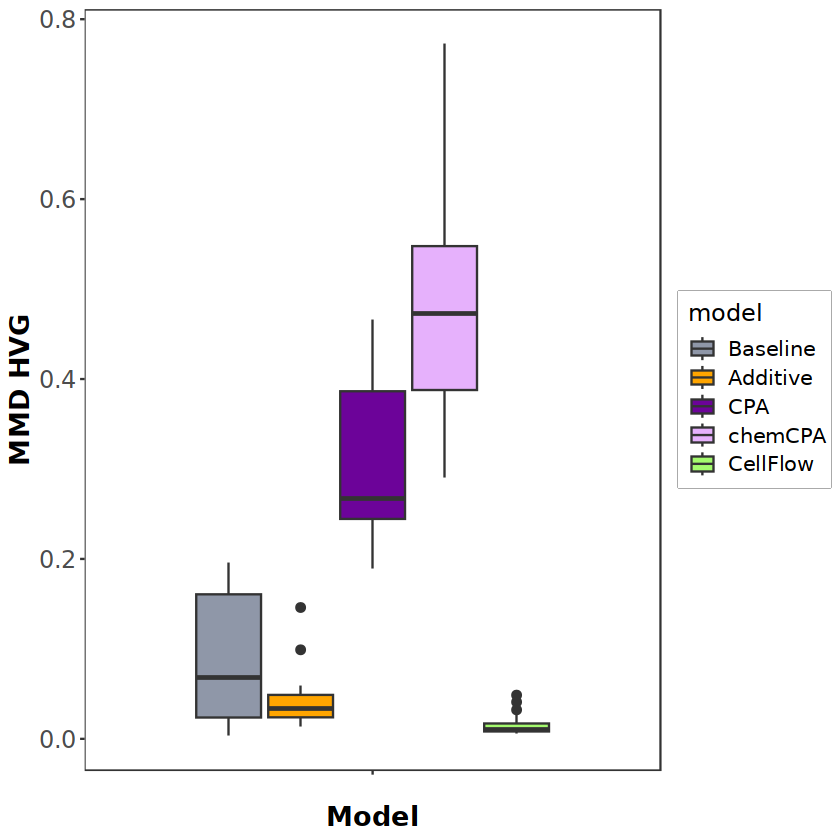

In [18]:
results <- results_deg %>% filter(metric == "mmd")


results$model <- factor(results$model, 
                                levels = c("id", "add", "CPA", "chemCPA", "otfm"),
                                labels = c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow"))  # Rename levels

ggplot(results, aes(x=metric, y=value, fill=model)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="MMD HVG") +
    scale_fill_manual(values=color_dict, labels=c("Baseline", "Additive", "CPA", "chemCPA", "CellFlow")) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
